In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # for graphical representation

In [42]:
df = pd.read_csv('/content/sample_data/Salary_dataset.csv') #importing csv as pandas dataframe

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [44]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [45]:
df.corr()

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [46]:
df1 = df[['YearsExperience','Salary']]

In [47]:
df1.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [48]:
df1.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [53]:
df1['YearsExperience'].shape

(30,)

In [54]:
df1['Salary'].shape

(30,)

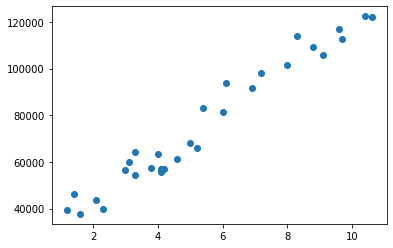

In [55]:
plt.scatter(df1.YearsExperience,df1.Salary)
plt.show()

In [58]:
def mean_squared_error(m,b,points):
  total_error=0
  for i in range(len(points)):
    x = points.iloc[i].YearsExperience
    y = points.iloc[i].Salary
    total_error += (y - (m*x+b)) ** 2
  total_error / float(len(points))

In [59]:
def gradient_descent(m_now,b_now,points,L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
     x = points.iloc[i].YearsExperience
     y = points.iloc[i].Salary
     m_gradient += -(2/n) * x * (y-(m_now*x+b_now))
     b_gradient += -(2/n) * (y-(m_now*x+b_now))
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  return m,b

Epochs 0
Epochs 50
Epochs 100
Epochs 150
Epochs 200
Epochs 250
11470.235399093604 1971.8041713652706


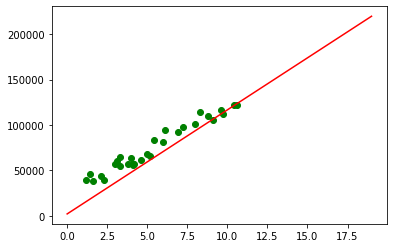

In [62]:
m=1
b=1
L=0.0001
epochs = 300
for i in range(epochs):
  if i % 50 ==0:
    print(f'Epochs {i}')
  m,b= gradient_descent(m,b,df1,L)
print(m,b)
plt.scatter(df1.YearsExperience,df1.Salary , color='green')
plt.plot(list(range(0,20)),[m*x+b for x in range(0,20)],color='red')